## Breast Cancer Detection 

Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set (http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29)

Objective: This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant.

### Load Data

In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# importing our cancer dataset
dataset = pd.read_csv("Breast Cancer Data.csv")
del dataset['Unnamed: 32']
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

In [3]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Exploratory Data Analysis

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
dataset.shape

(569, 32)

In [6]:
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

diagnosis
B    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
M    [[AxesSubplot(0.125,0.779333;0.103333x0.100667...
dtype: object

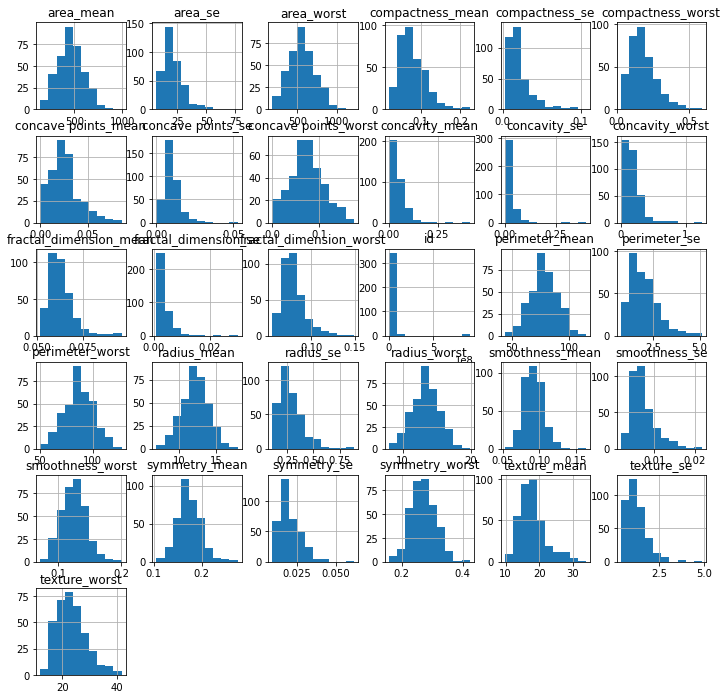

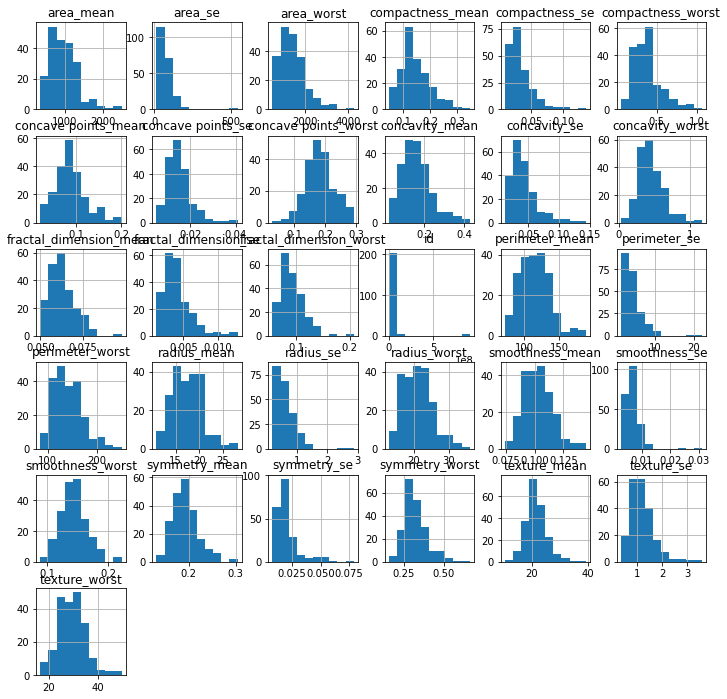

In [7]:
#Visualization of data

dataset.groupby('diagnosis').hist(figsize=(12, 12))

In [8]:
# Missing or Null Data points
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

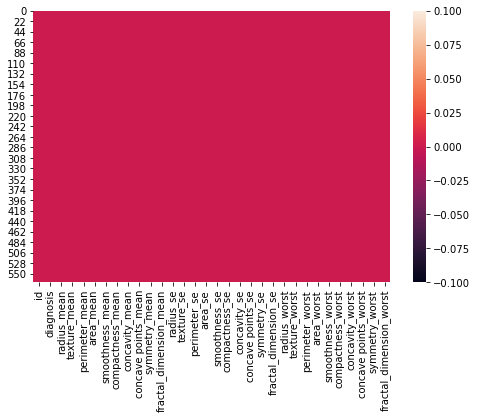

In [9]:
# Heatmap indicating null values in the Dataset
plt.figure(figsize=(8,5))
plt.show(sns.heatmap(dataset.isnull()))

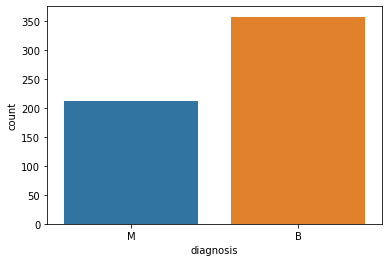

In [10]:
sns.countplot(dataset['diagnosis'])

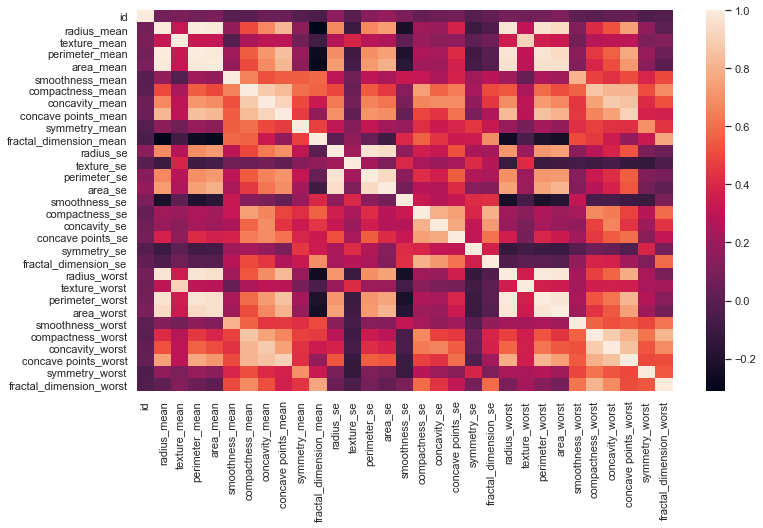

In [11]:
cor = dataset.corr()
sns.set(rc={'figure.figsize':(12,7)})
sns.heatmap(cor)

In [12]:
# Label Encoder to label the categorical data values

from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [13]:
dataframe = pd.DataFrame(y)
dataframe.head()

,0
0,1
1,1
2,1
3,1
4,1


### Splitting the dataset into the Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### ML Algorithm Selection

#### Logistic Regression

In [16]:
#Fitting the Logistic Regression Algorithm to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 95.8 
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[87  3]
 [ 3 50]]
Accuracy: 95.8041958041958%


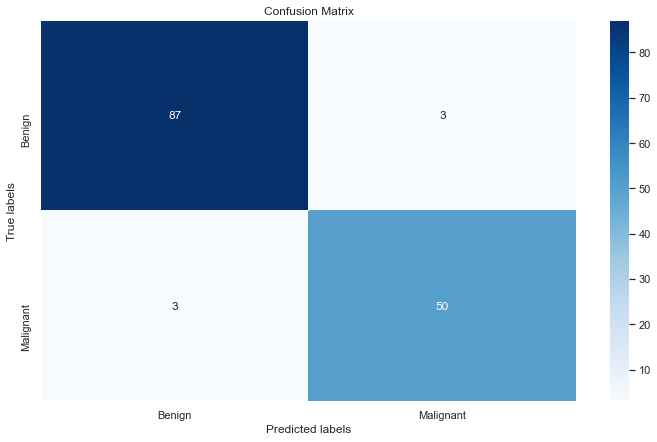

In [17]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

#### K-Nearest Neighbor

In [18]:
#Fitting the KNN Algorithm to the Training Set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 95.1
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[89  1]
 [ 6 47]]
Accuracy: 95.1048951048951%


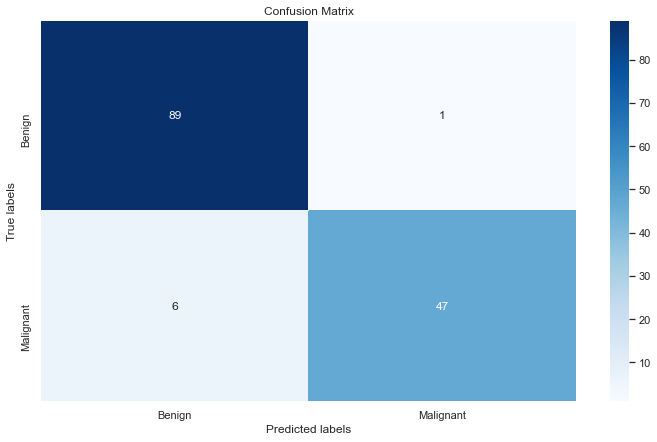

In [19]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

#### Support Vector Machines (SVM)

In [20]:
#Fitting the SVM Algorithm to the Training Set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 97.2
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[88  2]
 [ 2 51]]
Accuracy: 97.2027972027972%


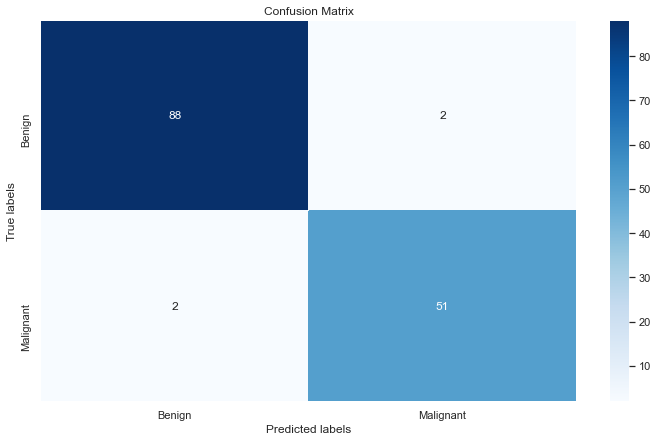

In [21]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

#### Kernel SVM

In [22]:
#Fitting the K-SVM Algorithm to the Training Set

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train) 

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 96.5
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[88  2]
 [ 3 50]]
Accuracy: 96.5034965034965%


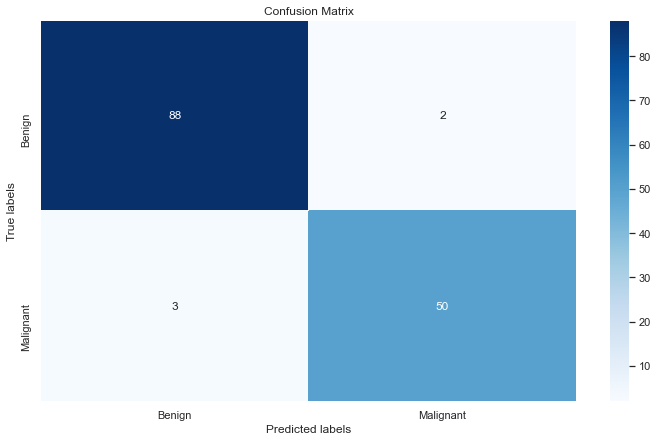

In [23]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

#### Grid Search CV

In [24]:
#Fitting Grid Search CV Algorithm to the Training Set

from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
classifier = GridSearchCV(SVC(), param_grid, verbose = 3)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 97.9
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.628, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.635, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.624, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.624, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.919, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........................ C=1, gamma=1, score=0.635, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.624, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.635, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.624, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.965, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.965, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.929, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ................. C=100, gamma=0.0001, score=0.977, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.976, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.941, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.976, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] ................. C=100, gamma=0.0001, score=0.988, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.640, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.635, total=   0.0s
[CV] C=1000, gamma=1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.8s finished


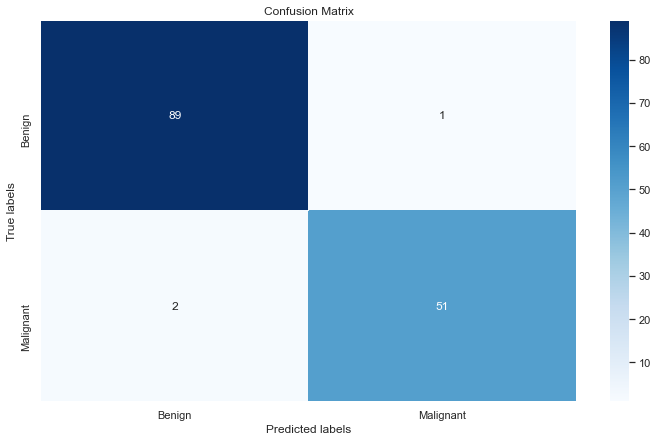

In [25]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

#### Naïve Bayes

In [26]:
#Fitting the Naïve Bayes Algorithm to the Training Set

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train) 

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 91.6
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[84  6]
 [ 6 47]]
Accuracy: 91.6083916083916%


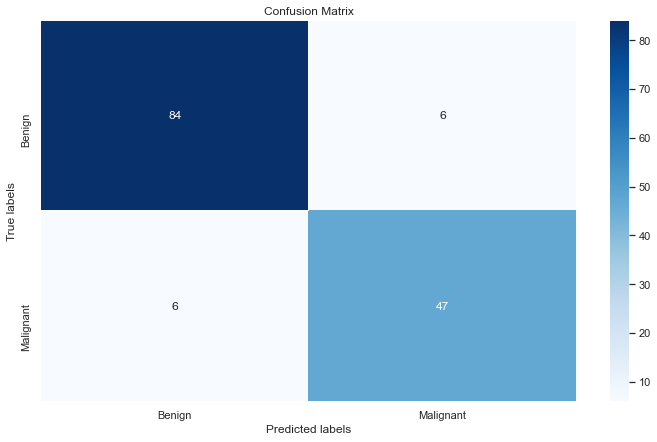

In [27]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

#### Decision Tree Algorithm

In [28]:
#Fitting Decision Tree Algorithm to the Training Set

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train) 

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 95.8
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[86  4]
 [ 2 51]]
Accuracy: 95.8041958041958%


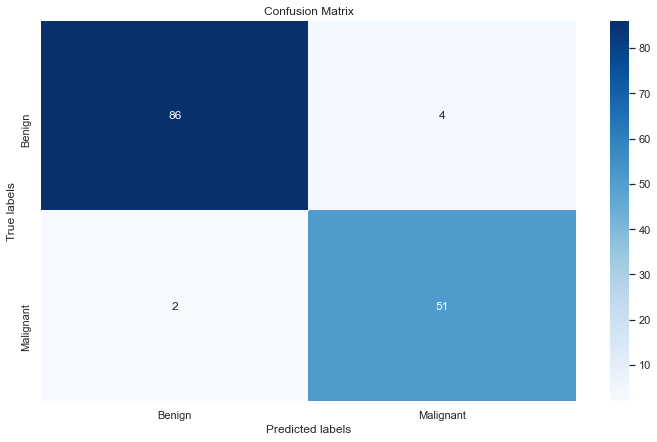

In [29]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

#### Random Forest Classification

In [30]:
#Fitting Random Forest Classification Algorithm

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train) 

# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 98.6
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[89  1]
 [ 1 52]]
Accuracy: 98.6013986013986%


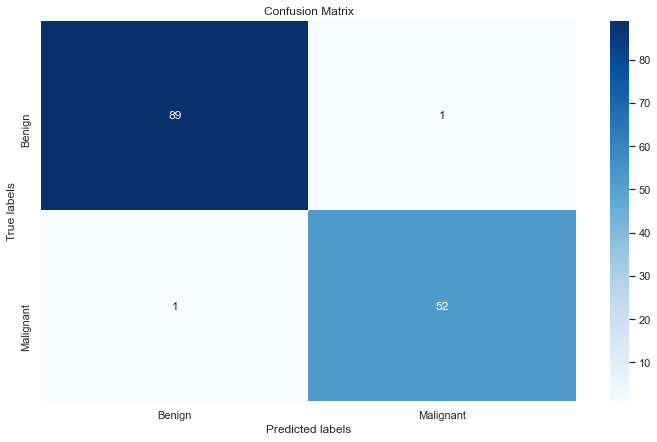

In [31]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

### ANN Model using Keras

In [32]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.models import Sequential

# from tensorflow.keras.layers import Conv1D
# from tensorflow.keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint

In [33]:
classifier = Sequential()  # Initialising the ANN

classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))# first layer
classifier.add(Dense(units=8, kernel_initializer='uniform', activation='relu')) #first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu')) #second hidden layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #output layer
classifier.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(X_train, y_train, batch_size=1, epochs=20)

Epoch 1/20
426/426 [==============================] - 1s 856us/step - loss: 0.5959 - accuracy: 0.7512
Epoch 2/20
426/426 [==============================] - 0s 820us/step - loss: 0.1662 - accuracy: 0.9554
Epoch 3/20
426/426 [==============================] - 0s 816us/step - loss: 0.1075 - accuracy: 0.9718
Epoch 4/20
426/426 [==============================] - 0s 789us/step - loss: 0.1004 - accuracy: 0.9742
Epoch 5/20
426/426 [==============================] - 0s 799us/step - loss: 0.1127 - accuracy: 0.9742
Epoch 6/20
426/426 [==============================] - 0s 788us/step - loss: 0.1009 - accuracy: 0.9789
Epoch 7/20
426/426 [==============================] - 0s 803us/step - loss: 0.0943 - accuracy: 0.9789
Epoch 8/20
426/426 [==============================] - 0s 804us/step - loss: 0.0916 - accuracy: 0.9812
Epoch 9/20
426/426 [==============================] - 0s 791us/step - loss: 0.0927 - accuracy: 0.9836
Epoch 10/20
426/426 [==============================] - 0s 803us/step - loss: 0.096

In [34]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

# Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy Score = 95.8
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
print("Accuracy: " + str(accuracy * 100) + "%")

[[89  1]
 [ 3 50]]
Accuracy: 97.2027972027972%


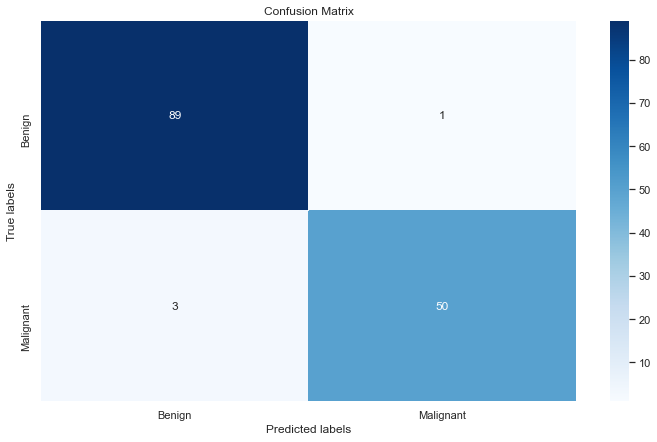

In [35]:
ax = plt.subplot()

#annot=True to annotate cells
sns.heatmap(cm, annot=True, ax = ax,cmap='Blues',fmt='');

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Benign', 'Malignant']); ax.yaxis.set_ticklabels(['Benign', 'Malignant']);

We notice that Random Forest ALgorithm / Model / Classifier has the best accuracy (98.6 %)